<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/Diracturing/Lab_5/Diracturing_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Julius Andersson**

# **Abstract**
In this lab 3 algorithm was constructed. The first one was a 2-point Gauss quadrature over a unit interval. The second was a 3-point edge midpoint quadrature over a reference triangle. Lastly Monte Carlo quadrature over a unit interval was constructed. Several tests was performed to verify that the two first algorithm was implemented correct and also that the last algorithm had the right convergence. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [2]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [94]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import scipy.integrate as integrate
import random
import math
from scipy.optimize import curve_fit

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
The theme in this lab was different methods for integration. The first was the Gauss quadrature. It can be used to solve integration of polynomials up to a certain degree exact. In the 1 dimensional case when using q+1 quadrature points it is posible to solve polynomials up to degree 2q+1. It can also be used in higher dimensions. The second method was the Monte-Carlo method. It is much different from previous algorithms because it is based on probabilities.

# **Method**

Gauss two point iteration: \\
Given a polynomial p(x), $\int_{a}^{b} p(x)\,dx$=$\sum_{i=0}^{q} p(x_i)w_i$. We therefore have to find the weights $w_i$ and the points $x_i$. This can be done with equation 11.4 in the lecture notes.

In [128]:
def gauss2point(f):
  w1=w0=1
  x0=1/(3)**(1/2)
  x1=-1/(3)**(1/2)
  return 1/2*(f(1/2+1/2*x0)+f(1/2+1/2*x1))




 3-point edge midpoint quadrature over a reference triangle: \\
 Same as before but this time we are in 2D and using a reference triangle instead of an interval.

In [129]:
def gauss3point(f):
  w0=w1=w2=1/6
  x01=0
  x02=1/2
  x11=1/2 
  x12=1/2
  x21=1/2
  x22=0
  return 1/6*(f(x01,x02)+f(x11,x12)+f(x21,x22))


Monte Carlo quadrature over a unit interval: \\
The algorithm is based on equation 12.4 in the lecture notes.

In [130]:
def monteCarlo(f,iterations):
  sum=0
  for i in range(iterations):
    sum+=f(random.uniform(0,1))
  return (sum/iterations)

# **Results**

1) Here we test if our algorithm solves the integration exactly. By integrating the polynomial analytical we can compare to our algorithm.

In [41]:
for i in range(100):
  a=random.randint(0,100)
  b=random.randint(0,100)
  c=random.randint(0,100)
  d=random.randint(0,100)

  e=lambda x:(a*x**4/4+b*x**3/3+c*x**2/2+d*x)
  result1=e(1)-e(0)

  f=lambda x: a*x**3+b*x**2+c*x+d
  result2=gauss2point(f)

  assert(abs(result1-result2)<1E-10)

print("Ok")

Ok


2) As before we compare the integration with an analytical solved solution. Look here how to solve it analytical [1].

In [73]:
for i in range(100):
  a=random.randint(0,100)
  b=random.randint(0,100)
  c=random.randint(0,100)
  d=random.randint(0,100)
  e=random.randint(0,100)
  f=random.randint(0,100)

  result1=(12*f+4*d+c+2*b+2*a+4*e)/24

  fun=lambda x,y: a*x**2+b*y**2+c*x*y+d*x+e*y+f
  result2=gauss3point(fun)

  assert(abs(result1-result2)<1E-10)

print("Ok")

Ok


3) Lastly we check how the convergence of our solution in the Monte-Carlo method. For each chosen number of iterations N, we calculate an average. We then fit this to $x^{-a}$. The convergence is plotted only for $x^2+x+2$.

[1.40411376]
[0.79642714]
[2.70434897]


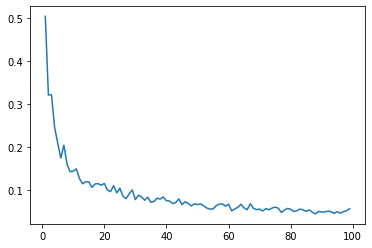

In [127]:
def objective(x, a):
	return x**(-a)

##############T1#################
f=lambda x: x
ans=1/2
y=[]
for n in range(1,100):
  sum=0
  for j in range(100):
    sum+=abs(monteCarlo(f,n)-ans)
  y.append(sum/100)

x=[i for i in range(1,100)]

popt, _ = curve_fit(objective, x, y)
print(popt)


##############T2#################
f=lambda x: x**2+x+2
ans=17/6
y=[]
for n in range(1,100):
  sum=0
  for j in range(100):
    sum+=abs(monteCarlo(f,n)-ans)
  y.append(sum/100)

x=[i for i in range(1,100)]

popt, _ = curve_fit(objective, x, y)
print(popt)
plt.plot(x,y)

##############T3#################
f=lambda x: math.cos(x)*math.sin(x)
ans=0.3540367091367856
y=[]
for n in range(1,100):
  sum=0
  for j in range(100):
    sum+=abs(monteCarlo(f,n)-ans)
  y.append(sum/100)

x=[i for i in range(1,100)]

popt, _ = curve_fit(objective, x, y)
print(popt)

# **Discussion**
As can be seen in the two first tests the guass quadrature algorithms pass all tests. For me atleast it is suprising that gauss quadrature can solve high order polynomials exact for a low number of quadrature points. For the Monte-Carlo method we see that it converges relatively fast. The convergence should be proportional to $\frac{1}{\sqrt{n}}=n^{-1/2}$. When fitting our convergence curves to $x^{-a}$ we get values from 0.8-2.7. We therefore see a faster convergence but we have not accounted for any constants. We also have not too many trials. Further work could be comparing gauss quadrature and Monte-Carlo in how fast they solve problems in much higher dimension. 

# **APPENDIX**
[1] https://mathinsight.org/double_integral_examples.